<a href="https://colab.research.google.com/github/AYUSH19VERMA/Pipeline-_Project/blob/main/pyABC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyabc 

     |████████████████████████████████| 245kB 7.8MB/s 
     |████████████████████████████████| 22.3MB 121kB/s 
     |████████████████████████████████| 28.5MB 98kB/s 
     |████████████████████████████████| 10.3MB 28.6MB/s 
     |████████████████████████████████| 727kB 38.9MB/s 
     |████████████████████████████████| 174kB 52.5MB/s 
     |████████████████████████████████| 81kB 10.7MB/s 
     |████████████████████████████████| 9.9MB 26.2MB/s 
     |████████████████████████████████| 983kB 26.6MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 122kB 39.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.5 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Found existing in

In [ ]:
import numpy as np
import matplotlib.pyplot as pyplot
import pyabc
import logging

pyabc.settings.set_figure_params('pyabc')  # for beautified plots

In [ ]:
# for debugging
df_logger = logging.getLogger('ABC.Distance')
df_logger.setLevel(logging.DEBUG)
# model definition
def model(p):
    return {'ss1': p['alpha1'] + 1 + 0.1 * np.random.normal(),
            'ss2': 2 + 10 * np.random.normal()}
# true model parameter
theta_true = 3

# observed summary statistics
observation = {'ss1': theta_true + 1, 'ss2': 2}

# prior distribution
prior = pyabc.Distribution(theta=pyabc.RV('uniform', 0, 10))

# database
db_path = pyabc.create_sqlite_db_id(file_="adaptive_distance.db")

In [ ]:
distance = pyabc.PNormDistance(p=2)

abc = pyabc.ABCSMC(model, prior, distance)

abc.new(db_path, observation)

history0 = abc.run(minimum_epsilon=.1, max_nr_populations=8)

ABC.Sampler INFO: Parallelize sampling on 2 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2021-07-01 18:25:08.732102>
ABC INFO: Calibration sample t = -1.
ABC INFO: t: 0, eps: 8.19372765e+00.
ABC INFO: Accepted: 100 / 184 = 5.4348e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 4.79146486e+00.
ABC INFO: Accepted: 100 / 381 = 2.6247e-01, ESS: 9.6005e+01.
ABC INFO: t: 2, eps: 2.97664190e+00.
ABC INFO: Accepted: 100 / 635 = 1.5748e-01, ESS: 9.7023e+01.
ABC INFO: t: 3, eps: 2.06186904e+00.
ABC INFO: Accepted: 100 / 935 = 1.0695e-01, ESS: 9.7331e+01.
ABC INFO: t: 4, eps: 1.46735085e+00.
ABC INFO: Accepted: 100 / 1484 = 6.7385e-02, ESS: 9.9524e+01.
ABC INFO: t: 5, eps: 1.07057909e+00.
ABC INFO: Accepted: 100 / 1816 = 5.5066e-02, ESS: 9.6638e+01.
ABC INFO: t: 6, eps: 7.42807971e-01.
ABC INFO: Accepted: 100 / 2647 = 3.7779e-02, ESS: 9.6588e+01.
ABC INFO: t: 7, eps: 5.89572527e-01.
ABC INFO: Accepted: 100 / 3079 = 3.2478e-02, ESS: 9.8966e+01.
ABC INFO: Stop: Maximum number of generatio

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Uninstalling matplotlib-3.4.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.4.2
     |████████████████████████████████| 13.1MB 236kB/s 
ERROR: pyabc 0.10.16 has requirement matplotlib>=3.3.0, but you'll have matplotlib 3.1.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


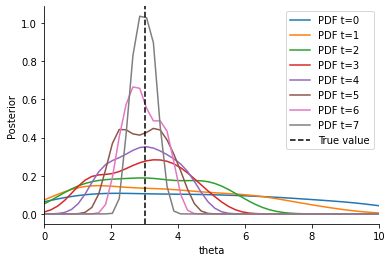

In [ ]:
# plotting

def plot_history(history):
    fig, ax = pyplot.subplots()
    for t in range(history.max_t + 1):
        df, w = history.get_distribution(m=0, t=t)
        pyabc.visualization.plot_kde_1d(df, w, xmin=0, xmax=10,
                                       x='theta', ax=ax,
                                       label="PDF t={}".format(t))
    ax.axvline(theta_true, color='k', linestyle='dashed', label="True value")
    ax.legend()


plot_history(history0)

**NOISE**


In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pyabc
%matplotlib inline
pyabc.settings.set_figure_params('pyabc')  # for beautified plots

# initialize global random state
np.random.seed(2)

# initial states
init = np.array([1e6, 0, 0, 0])

# time points
n_time = 48
measurement_times = np.linspace(0, 48, n_time)

def f(y, t0, alpha, M = 0.3e6, Nv =  150e6, beta = 0.28, k_NF = 1.2e-6, d_MF = 0.32e-6, k_C = 0.38e-12, k_CD = 0.31e-6, delta_C = 0.066, delta_N = 0.061, alpha_D_Dv = 0.017e6, k_ND = 0.0069e-6, delta_D = 0.1):
    """ODE right-hand side."""
    F, C, N, D = y
    dFdt = beta*F - k_NF*N*F - d_MF*M*F
    dCdt = k_C*M*F + k_CD*D - delta_C*C
    dNdt = alpha*Nv*C - k_NF*N*F - delta_N*N
    dDdt = alpha_D_Dv*C - k_ND*N*D - delta_D*D
    return dFdt, dCdt, dNdt, dDdt

def model(p: dict):
    """ODE model."""
    sol = sp.integrate.odeint(f, init, measurement_times, args=(p["alpha"],))
    return {'X_2': sol[:,3]}

# true parameter
alpha1_true = {'alpha': 0.0017}

# uniform prior distribution
alpha_min, alpha_max = 0.00012, 0.002
alpha1_lims = {'alpha': (alpha_min, alpha_max)}
prior = pyabc.Distribution(alpha=pyabc.RV("uniform", alpha_min, alpha_max-alpha_min))

# true noise-free data
true_trajectory = model(alpha1_true)

# population size
pop_size = 500

In [ ]:
print(X_2)

NameError: ignored

In [ ]:
%%time
for _ in range(3):
    model(alpha1_true)

CPU times: user 23.7 ms, sys: 0 ns, total: 23.7 ms
Wall time: 23.8 ms


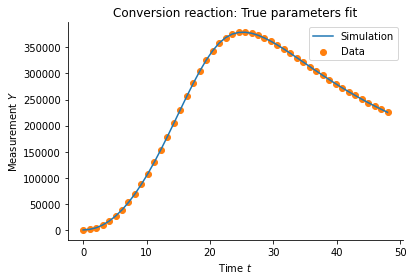

In [ ]:
#noise standard deviation
sigma = 0.04

def model_noisy(pars):
    """Add noise to model output"""
    sim = model(pars)
    return {'X_2': sim['X_2'] + sigma * np.random.randn(n_time)}

# the actual observed data
measured_data = model_noisy(alpha1_true)

# plot data
plt.plot(measurement_times, true_trajectory['X_2'], color="C0",
         label='Simulation')
plt.scatter(measurement_times, measured_data['X_2'],
            color="C1", label='Data')
plt.xlabel('Time $t$')
plt.ylabel('Measurement $Y$')
plt.title('Conversion reaction: True parameters fit')
plt.legend()
plt.show()


***`True posterior`***

In [ ]:
def normal_dty(y_bar, y, sigma):
    """Uncorrelated multivariate Gaussian density `y_bar ~ N(y, sigma)."""
    y_bar, y, sigma = y_bar.flatten(), y.flatten(), sigma.flatten()
    return np.prod(
        1 / np.sqrt( 2 * np.pi * sigma**2)
        * np.exp( - ( (y_bar - y) / sigma)**2 / 2)
    )

def posterior_unscaled_1d(p):
    """Unscaled posterior density."""
    # simulations and sigmas as arrays
    y = model(p)['X_2'].flatten()
    sigmas = sigma * np.ones(n_time)

    # unscaled likelihood
    likelihood_val = normal_dty(measured_data['X_2'], y, sigmas)

    # prior
    prior_val = prior.pdf(p)

    return likelihood_val * prior_val

# the integral needs to be 1
posterior_normalization = sp.integrate.quad(lambda x: posterior_unscaled_1d({'alpha': x}),*alpha1_lims['alpha'])[0]

def posterior_scaled_1d(p):
    """Posterior over theta with integral 1."""
    return posterior_unscaled_1d(p) / posterior_normalization

# calculate posterior on grid values
xs = np.linspace(*alpha1_lims['alpha'], 200)
true_fvals = [posterior_scaled_1d({'alpha': x}) for x in xs]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


***`Ignoring noise`***

In [ ]:
def distance(simulation, data):
    """Here we use an l2 distance."""
    return np.sum((data["X_2"] - simulation["X_2"])**2)

abc = pyabc.ABCSMC(model, prior, distance, population_size=pop_size)
abc.new(pyabc.create_sqlite_db_id(), measured_data)
history_ignore = abc.run(max_nr_populations=7)

ABC.Sampler INFO: Parallelize sampling on 2 processes.
ABC.History INFO: Start <ABCSMC id=2, start_time=2021-07-01 18:29:21.804876>
ABC INFO: Calibration sample t = -1.
ABC INFO: t: 0, eps: 3.19075319e+13.
ABC INFO: Accepted: 500 / 983 = 5.0865e-01, ESS: 5.0000e+02.
ABC INFO: t: 1, eps: 2.18508345e+11.
ABC INFO: Accepted: 500 / 1051 = 4.7574e-01, ESS: 4.9595e+02.
ABC INFO: t: 2, eps: 6.89325769e+10.
ABC INFO: Accepted: 500 / 901 = 5.5494e-01, ESS: 4.9835e+02.
ABC INFO: t: 3, eps: 1.90982753e+10.
ABC INFO: Accepted: 500 / 946 = 5.2854e-01, ESS: 4.9946e+02.
ABC INFO: t: 4, eps: 4.70459262e+09.
ABC INFO: Accepted: 500 / 1009 = 4.9554e-01, ESS: 4.9978e+02.
ABC INFO: t: 5, eps: 1.15538203e+09.
ABC INFO: Accepted: 500 / 1004 = 4.9801e-01, ESS: 4.9858e+02.
ABC INFO: t: 6, eps: 3.19997125e+08.
ABC INFO: Accepted: 500 / 966 = 5.1760e-01, ESS: 4.9835e+02.
ABC INFO: Stop: Maximum number of generations.
ABC.History INFO: Done <ABCSMC id=2, duration=0:01:03.798371, end_time=2021-07-01 18:30:25.6032

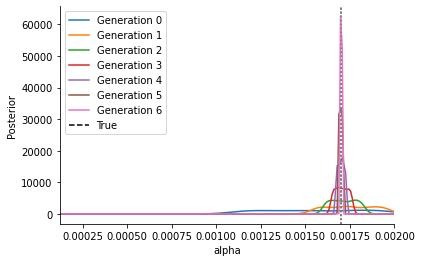

In [ ]:
_, ax = plt.subplots()
for t in range(history_ignore.max_t + 1):
    pyabc.visualization.plot_kde_1d_highlevel(
        history_ignore, x="alpha", t=t, refval=alpha1_true,
        refval_color='grey', xmin=alpha_min, xmax=alpha_max, numx=200, ax=ax,
        label=f"Generation {t}")
ax.plot(xs, true_fvals, color='black', linestyle='--', label="True")
ax.legend()
plt.show()

***`Add noise to the model output`***

In [ ]:
abc = pyabc.ABCSMC(model_noisy, prior, distance, population_size=pop_size)
abc.new(pyabc.create_sqlite_db_id(), measured_data)
history_noisy_output = abc.run(max_nr_populations=8)

ABC.Sampler INFO: Parallelize sampling on 2 processes.
ABC.History INFO: Start <ABCSMC id=3, start_time=2021-07-01 18:30:44.249150>
ABC INFO: Calibration sample t = -1.
ABC INFO: t: 0, eps: 4.43461064e+13.
ABC INFO: Accepted: 500 / 975 = 5.1282e-01, ESS: 5.0000e+02.
ABC INFO: t: 1, eps: 3.34440070e+11.
ABC INFO: Accepted: 500 / 1075 = 4.6512e-01, ESS: 4.9477e+02.
ABC INFO: t: 2, eps: 6.58190218e+10.
ABC INFO: Accepted: 500 / 985 = 5.0761e-01, ESS: 4.9951e+02.
ABC INFO: t: 3, eps: 1.69490776e+10.
ABC INFO: Accepted: 500 / 981 = 5.0968e-01, ESS: 4.9852e+02.
ABC INFO: t: 4, eps: 3.78031311e+09.
ABC INFO: Accepted: 500 / 1049 = 4.7664e-01, ESS: 4.9906e+02.
ABC INFO: t: 5, eps: 7.91496551e+08.
ABC INFO: Accepted: 500 / 1078 = 4.6382e-01, ESS: 4.9927e+02.
ABC INFO: t: 6, eps: 1.74463060e+08.
ABC INFO: Accepted: 500 / 1039 = 4.8123e-01, ESS: 4.9912e+02.
ABC INFO: t: 7, eps: 3.98055739e+07.
ABC INFO: Accepted: 500 / 1019 = 4.9068e-01, ESS: 4.9964e+02.
ABC INFO: Stop: Maximum number of generati

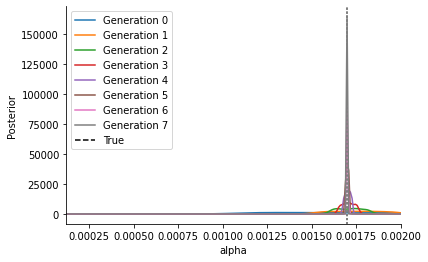

In [ ]:
_, ax = plt.subplots()
for t in range(history_noisy_output.max_t + 1):
    pyabc.visualization.plot_kde_1d_highlevel(history_noisy_output, x="alpha", t=t, refval=alpha1_true, refval_color='grey',
        xmin=alpha_min, xmax=alpha_max, ax=ax, numx=200, label=f"Generation {t}")
ax.plot(xs, true_fvals, color='black', linestyle='--', label="True")
ax.legend()

***`Modify the acceptance step `***

In [ ]:
acceptor = pyabc.StochasticAcceptor()
kernel = pyabc.IndependentNormalKernel(var=sigma**2)
eps = pyabc.Temperature()

abc = pyabc.ABCSMC(model, prior, kernel, eps=eps, acceptor=acceptor,
                   population_size=pop_size)
abc.new(pyabc.create_sqlite_db_id(), measured_data)
history_acceptor = abc.run(max_nr_populations=10)

ABC.Sampler INFO: Parallelize sampling on 2 processes.
ABC.History INFO: Start <ABCSMC id=4, start_time=2021-07-01 18:32:24.426386>
ABC INFO: Calibration sample t = -1.
ABC INFO: t: 0, eps: 2.62831122e+14.
ABC INFO: Accepted: 500 / 1894 = 2.6399e-01, ESS: 5.0000e+02.
ABC INFO: t: 1, eps: 6.56886715e+12.
ABC INFO: Accepted: 500 / 2311 = 2.1636e-01, ESS: 4.9954e+02.
ABC INFO: t: 2, eps: 1.64173920e+11.
ABC INFO: Accepted: 500 / 3272 = 1.5281e-01, ESS: 4.9968e+02.
ABC INFO: t: 3, eps: 4.10315440e+09.
ABC INFO: Accepted: 500 / 3387 = 1.4762e-01, ESS: 4.9971e+02.
ABC INFO: t: 4, eps: 1.02549028e+08.
ABC INFO: Accepted: 500 / 3226 = 1.5499e-01, ESS: 4.9988e+02.
ABC INFO: t: 5, eps: 2.56298013e+06.
ABC INFO: Accepted: 500 / 3511 = 1.4241e-01, ESS: 4.9956e+02.
ABC INFO: t: 6, eps: 6.40558693e+04.
ABC INFO: Accepted: 500 / 3277 = 1.5258e-01, ESS: 4.9984e+02.
ABC INFO: t: 7, eps: 1.60093102e+03.
ABC INFO: Accepted: 500 / 3107 = 1.6093e-01, ESS: 4.9981e+02.
ABC INFO: t: 8, eps: 4.00116361e+01.
AB

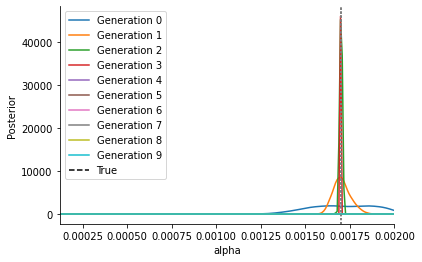

In [ ]:
_, ax = plt.subplots()
for t in range(history_acceptor.max_t + 1):
    pyabc.visualization.plot_kde_1d_highlevel(
        history_acceptor, x="alpha", t=t,
        refval=alpha1_true, refval_color='grey',
        xmin=alpha_min, xmax=alpha_max,
        ax=ax, numx=200, label=f"Generation {t}")
ax.plot(xs, true_fvals, color='black', linestyle='--', label="True")
ax.legend()
plt.show()

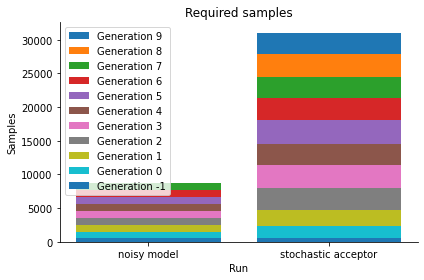

In [ ]:
histories = [history_noisy_output, history_acceptor]
labels = ["noisy model", "stochastic acceptor"]

pyabc.visualization.plot_sample_numbers(histories, labels)
plt.show()

***`Estimate noise parameters`***

In [ ]:
alpha1_true_var = {'alpha': alpha1_true['alpha'],
                  'std': np.log10(sigma)}

std_min, std_max = np.log10([0.002, 1])
theta_lims_var = {'alpha': (alpha_min, alpha_max),
                  'std': (std_min, std_max)}

prior = pyabc.Distribution(
    alpha=pyabc.RV("uniform", alpha_min, alpha_max-alpha_min),
    std=pyabc.RV("uniform", std_min, std_max-std_min))

In [ ]:
%%time

def posterior_unscaled(p):
    """Unscaled posterior with parameter-dependent noise levels."""
    # simulations and sigmas as arrays
    y = model(p)['X_2']
    sigma = 10**p['std'] * np.ones(n_time)

    # unscaled likelihood
    likelihood_val = normal_dty(measured_data['X_2'], y, sigma)

    # prior
    prior_val = prior.pdf(p)

    return likelihood_val * prior_val

# calculate posterior normalization
posterior_normalization = None
# comment out this line to recompute the normalization
posterior_normalization = 382843631.1961108
if posterior_normalization is None:
    posterior_normalization = sp.integrate.dblquad(
        lambda std, alpha: posterior_unscaled({'alpha': alpha, 'std': std}),
        *alpha1_lims_var['alpha'],
        lambda alpha: std_min, lambda alpha: std_max, epsabs=1e-4)[0]
    print(posterior_normalization)

def posterior_scaled(p):
    """Normalized posterior."""
    return posterior_unscaled(p) / posterior_normalization

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


In [ ]:
%%time

def marg_alpha(alpha):
    """Posterior marginal w.r.t. alpha."""
    return sp.integrate.quad(
        lambda std: posterior_scaled({'alpha': alpha, 'std': std}),
        *alpha1_lims_var['std'])[0]

def marg_std(std):
    """Posterior marginal w.r.t. std."""
    return sp.integrate.quad(
        lambda alpha: posterior_scaled({'alpha': alpha, 'std': std}),
        *alpha1_lims_var['alpha'])[0]

# calculate the densities on a grid

alphas = np.linspace(*alpha1_lims_var['alpha'], 100)
vals_alpha = [marg_alpha(alpha) for alpha in alphas]

stds = np.linspace(*alpha1_lims_var['std'], 100)
vals_std = [marg_std(std) for std in stds]


NameError: ignored

In [ ]:
  def var(p):
    """Parameterized variance function. Note `var = std**2`."""
    return 10**(2*p['std']) * np.ones(n_time)

acceptor = pyabc.StochasticAcceptor()
# pass variance function to kernel
kernel = pyabc.IndependentNormalKernel(var=var)
eps = pyabc.Temperature()

abc = pyabc.ABCSMC(model, prior, kernel, eps=eps, acceptor=acceptor,
                   population_size=pop_size)
abc.new(pyabc.create_sqlite_db_id(), measured_data)
history_acceptor_var = abc.run(max_nr_populations=6)

ABC.Sampler INFO: Parallelize sampling on 2 processes.
ABC.History INFO: Start <ABCSMC id=5, start_time=2021-07-01 18:37:28.509429>
ABC INFO: Calibration sample t = -1.
ABC INFO: t: 0, eps: 5.47519283e+14.
ABC INFO: Accepted: 500 / 1597 = 3.1309e-01, ESS: 5.0000e+02.
ABC INFO: t: 1, eps: 6.17617417e+11.
ABC INFO: Accepted: 500 / 2681 = 1.8650e-01, ESS: 4.7566e+02.
ABC INFO: t: 2, eps: 6.96690119e+08.
ABC INFO: Accepted: 500 / 13404 = 3.7302e-02, ESS: 4.5226e+02.
ABC INFO: t: 3, eps: 7.85886390e+05.
ABC INFO: Accepted: 500 / 17535 = 2.8514e-02, ESS: 3.9457e+02.
ABC INFO: t: 4, eps: 8.86502335e+02.
ABC INFO: Accepted: 500 / 18182 = 2.7500e-02, ESS: 1.5236e+02.
ABC INFO: t: 5, eps: 1.00000000e+00.
ABC INFO: Accepted: 500 / 120291 = 4.1566e-03, ESS: 4.2818e+01.
ABC INFO: Stop: Maximum number of generations.
ABC.History INFO: Done <ABCSMC id=5, duration=0:23:25.653497, end_time=2021-07-01 19:00:54.162926>


NameError: ignored

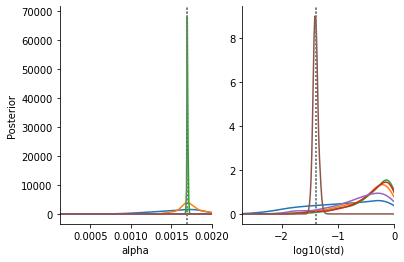

In [ ]:
fig, ax = plt.subplots(1, 2)
for t in range(history_acceptor_var.max_t + 1):
    pyabc.visualization.plot_kde_1d_highlevel(
        history_acceptor_var, x="alpha", t=t,
        refval=alpha1_true_var, refval_color='grey',
        xmin=alpha_min, xmax=alpha_max,
        ax=ax[0], numx=200, label=f"Generation {t}")
    pyabc.visualization.plot_kde_1d_highlevel(
        history_acceptor_var, x="std", t=t,
        refval=alpha1_true_var, refval_color='grey',
        xmin=std_min, xmax=std_max,
        ax=ax[1], numx=200, label=f"Generation {t}")
ax[1].set_xlabel("log10(std)")
ax[1].set_ylabel(None)

ax[0].plot(alphas, vals_alpha, color='black', linestyle='--', label="True")
ax[1].plot(stds, vals_std, color='black', linestyle='--', label="True")

ax[1].legend()
fig.set_size_inches((8, 4))
fig.tight_layout()
plt.show()